In [1]:
#Importing the necessary Libraries

import tensorflow as tf
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"  # see issue #152
os.environ['CUDA_VISIBLE_DEVICES'] = '0'  # -1  to USE CPU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense,Dropout
from keras.models import Model, load_model
from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from PIL import Image
from keras import Sequential,models,layers
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
from os import listdir
import scipy
import glob

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

get_ipython().magic(u'matplotlib inline')

NEURAL NETWORKS

The first model for classification is neural networks

The data used for this classification is found in this link 
https://www.kaggle.com/code/trishitchakrabarty/brain-tumour-detection
In this dataset, the images in the yes and no folders are used for training,
The model is then tested using images in the pred folder

In [48]:
#Get the path of the dataset files
train_dir='D:/VOLUME E/DATA SCIENCE/INSIGHTS/Brain Tumor Dataset/'
no_images=os.listdir(train_dir + 'no/')  #getting the labels for images without tumor
yes_images=os.listdir(train_dir + 'yes/') #getting the labels for images with tumor

In [49]:
#Displaying the images without tumor

no_images

['no0.jpg',
 'no1.jpg',
 'no10.jpg',
 'no100.jpg',
 'no1000.jpg',
 'no1001.jpg',
 'no1002.jpg',
 'no1003.jpg',
 'no1004.jpg',
 'no1005.jpg',
 'no1006.jpg',
 'no1007.jpg',
 'no1008.jpg',
 'no1009.jpg',
 'no101.jpg',
 'no1010.jpg',
 'no1011.jpg',
 'no1012.jpg',
 'no1013.jpg',
 'no1014.jpg',
 'no1015.jpg',
 'no1016.jpg',
 'no1017.jpg',
 'no1018.jpg',
 'no1019.jpg',
 'no102.jpg',
 'no1020.jpg',
 'no1021.jpg',
 'no1022.jpg',
 'no1023.jpg',
 'no1024.jpg',
 'no1025.jpg',
 'no1026.jpg',
 'no1027.jpg',
 'no1028.jpg',
 'no1029.jpg',
 'no103.jpg',
 'no1030.jpg',
 'no1031.jpg',
 'no1032.jpg',
 'no1033.jpg',
 'no1034.jpg',
 'no1035.jpg',
 'no1036.jpg',
 'no1037.jpg',
 'no1038.jpg',
 'no1039.jpg',
 'no104.jpg',
 'no1040.jpg',
 'no1041.jpg',
 'no1042.jpg',
 'no1043.jpg',
 'no1044.jpg',
 'no1045.jpg',
 'no1046.jpg',
 'no1047.jpg',
 'no1048.jpg',
 'no1049.jpg',
 'no105.jpg',
 'no1050.jpg',
 'no1051.jpg',
 'no1052.jpg',
 'no1053.jpg',
 'no1054.jpg',
 'no1055.jpg',
 'no1056.jpg',
 'no1057.jpg',
 'no1058.

In [50]:
#Displaying the images with tumor
yes_images

['y0.jpg',
 'y1.jpg',
 'y10.jpg',
 'y100.jpg',
 'y1000.jpg',
 'y1001.jpg',
 'y1002.jpg',
 'y1003.jpg',
 'y1004.jpg',
 'y1005.jpg',
 'y1006.jpg',
 'y1007.jpg',
 'y1008.jpg',
 'y1009.jpg',
 'y101.jpg',
 'y1010.jpg',
 'y1011.jpg',
 'y1012.jpg',
 'y1013.jpg',
 'y1014.jpg',
 'y1015.jpg',
 'y1016.jpg',
 'y1017.jpg',
 'y1018.jpg',
 'y1019.jpg',
 'y102.jpg',
 'y1020.jpg',
 'y1021.jpg',
 'y1022.jpg',
 'y1023.jpg',
 'y1024.jpg',
 'y1025.jpg',
 'y1026.jpg',
 'y1027.jpg',
 'y1028.jpg',
 'y1029.jpg',
 'y103.jpg',
 'y1030.jpg',
 'y1031.jpg',
 'y1032.jpg',
 'y1033.jpg',
 'y1034.jpg',
 'y1035.jpg',
 'y1036.jpg',
 'y1037.jpg',
 'y1038.jpg',
 'y1039.jpg',
 'y104.jpg',
 'y1040.jpg',
 'y1041.jpg',
 'y1042.jpg',
 'y1043.jpg',
 'y1044.jpg',
 'y1045.jpg',
 'y1046.jpg',
 'y1047.jpg',
 'y1048.jpg',
 'y1049.jpg',
 'y105.jpg',
 'y1050.jpg',
 'y1051.jpg',
 'y1052.jpg',
 'y1053.jpg',
 'y1054.jpg',
 'y1055.jpg',
 'y1056.jpg',
 'y1057.jpg',
 'y1058.jpg',
 'y1059.jpg',
 'y106.jpg',
 'y1060.jpg',
 'y1061.jpg',
 'y1062

In [51]:
#initialize dataset and label arrays
features=[]
target=[]

In [52]:
#loop over each image in each category
#The images in the yes folder are labeled as 1
#The images in the yes folder are labeled as 0

#for images labelled with no
for image_name in no_images:
    image=cv2.imread(train_dir + 'no/' +image_name)
    image=Image.fromarray(image,'RGB')
    image=image.resize((64,64))
    features.append(np.array(image))
    target.append(0)
    
#for images labelled with yes
for image_name in yes_images:
    image=cv2.imread(train_dir + 'yes/' +image_name)
    image=Image.fromarray(image,'RGB')
    image=image.resize((64,64))
    features.append(np.array(image))
    target.append(1)
    


#convert dataset and label to numpy to array    
x=np.asarray(features)
y=np.asarray(target)

In [53]:
#shape of the features and target 
print(x.shape, y.shape)

(3000, 64, 64, 3) (3000,)


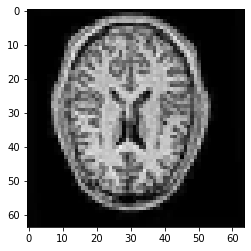

In [54]:
#Visualization of an image in features
plt.imshow(x[3])

In [55]:
#number of images which are independent variables
len(x)

3000

In [56]:
#Splitting the dataset for training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(y_train.shape)

(2400, 64, 64, 3)
(2400,)


Model Training

In [57]:
model=Sequential([
                     
                     #cnn
                    layers.Conv2D(50,(3,3),activation="relu",input_shape=(64,64,3)),
                    layers.MaxPooling2D((2,2)),
     
                    layers.Conv2D(64,(3,3),activation="relu"),
                    layers.MaxPooling2D((2,2)),
    
                    layers.Conv2D(54,(3,3),activation="relu"),
                    layers.MaxPooling2D((2,2)),
    
                     #dense_layer
                     layers.Flatten(),
                     layers.Dense(64,activation="relu"),
                     layers.Dense(2,activation="softmax")

])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 50)        1400      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 50)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 64)        28864     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 54)        31158     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 54)        

In [58]:
#The number of epochs can be adjusted to improve accuracy


model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(X_train,y_train,epochs=30)

Epoch 1/30
75/75 [==============================] - 9s 111ms/step - loss: 2.6851 - accuracy: 0.7342
Epoch 2/30
75/75 [==============================] - 8s 113ms/step - loss: 0.3294 - accuracy: 0.8683
Epoch 3/30
75/75 [==============================] - 9s 123ms/step - loss: 0.2421 - accuracy: 0.9079
Epoch 4/30
75/75 [==============================] - 9s 114ms/step - loss: 0.1354 - accuracy: 0.9533
Epoch 5/30
75/75 [==============================] - 9s 114ms/step - loss: 0.1125 - accuracy: 0.9596
Epoch 6/30
75/75 [==============================] - 9s 114ms/step - loss: 0.0680 - accuracy: 0.9808
Epoch 7/30
75/75 [==============================] - 9s 114ms/step - loss: 0.0300 - accuracy: 0.9933
Epoch 8/30
75/75 [==============================] - 8s 113ms/step - loss: 0.0166 - accuracy: 0.9971
Epoch 9/30
75/75 [==============================] - 9s 115ms/step - loss: 0.0146 - accuracy: 0.9975
Epoch 10/30
75/75 [==============================] - 9s 122ms/step - loss: 0.0046 - accuracy: 0.9996

Preparing images for prediction

In [59]:

pred_set=[]
pred_dir = 'D:/VOLUME E/DATA SCIENCE/INSIGHTS/Brain Tumor Dataset/'
pred_images=os.listdir(pred_dir +'pred/')
for image_name in pred_images:    
    image=cv2.imread(pred_dir +'pred/'+ image_name)
    image=Image.fromarray(image,'RGB')
    image=image.resize((64,64))
    pred_set.append(np.array(image))
pred=np.asarray(pred_set)

In [60]:
#Displaying the predictions of our models
pred

array([[[[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        ...,

        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]]],


       [[[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0, 

In [61]:
prediction=model.predict(X_test)
prediction=np.argmax(prediction,axis=1)

19/19 [==============================] - 1s 25ms/step


In [62]:
#Evaluating evaluation metrics
from sklearn.metrics import accuracy_score

In [65]:
#Evaluating the performance of the model
accuracy_score(prediction,y_test)


0.9833333333333333

CLASSIFICATION USING RANDOMFOREST CLASSIFIER

Defining the features and the target

In [67]:
X = np.array(features)
Y = np.array(target)


X_df = X.reshape(len(X), -1)

In [68]:
#Determining the classes of the targets
np.unique(Y)

array([0, 1])

In [69]:
#the number of values in each class
pd.Series(Y).value_counts()

0    1500
1    1500
dtype: int64

In [70]:
#Shape of the independent variables
X.shape, X_df.shape

((3000, 64, 64, 3), (3000, 12288))

Visualize data

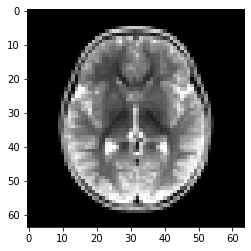

In [71]:
plt.imshow(X[0], cmap='gray')

Split Data for training

In [72]:
xtrain, xtest, ytrain, ytest = train_test_split(X_df, Y, random_state=47,
                                               test_size=0.2)

In [73]:
xtrain.shape, xtest.shape

((2400, 12288), (600, 12288))

Feature Scaling

In [74]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


Feature Selection: PCA

In [75]:
from sklearn.decomposition import PCA

In [76]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(2400, 12288) (600, 12288)


Train Model

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [78]:
#fit RandomforestClassifier model on train data
model2 = RandomForestClassifier()
model2.fit(xtrain, ytrain)
preds = model2.predict(xtest)

In [79]:
print(preds)

[1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1
 0 0 1 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 1 0
 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0
 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0
 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0
 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1
 0 0 1 1 1 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0
 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 1 1 1 0 0 1 1 1 0
 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 1 0 0 0 0 1 0
 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 1 0 0
 0 0 1 0 0 1 1 1 0 1 0 0 

In [80]:
print(metrics.classification_report(ytest, preds))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       301
           1       0.94      0.97      0.96       299

    accuracy                           0.95       600
   macro avg       0.96      0.96      0.95       600
weighted avg       0.96      0.95      0.95       600

